<a href="https://colab.research.google.com/github/AjalaSunday/Neural-Networks-Fall-2021/blob/main/Convolutional_Neural_Network_Implementation_for_Image_Classification_using_CIFAR_10_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA PREPROCESSING**

170508288/170498071 [==============================] - 2s 0us/step


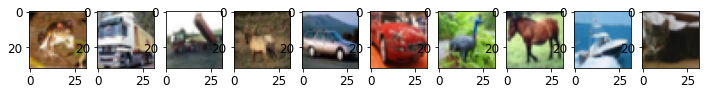

(50000, 32, 32, 3)

In [2]:
# Importing all requisite libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import regularizers
from keras import Sequential
import matplotlib

# Specify plot label tick size
matplotlib.rc("xtick", labelsize=12)
matplotlib.rc("ytick", labelsize=12)

# Loading the CIFAR10 training and test data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Plotting first 10 images in dataset
fig, axes = plt.subplots(1,10,figsize=(12,6))
for img,ax in zip(x_train[:10], axes):
  ax.imshow(img)
plt.show()

# Converting the training and test data to float32
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

# Normalizing the training and test data from 0-1.0
x_train/=255.0
x_test/=255.0
x_train.shape

**NET I: CONV-POOL-CONV-POOL-CONV-POOL-FC-FC**

Epoch 1/20
313/313 [==============================] - 5s 14ms/step - loss: 1.6033 - accuracy: 0.4152 - val_loss: 1.3687 - val_accuracy: 0.5092
Epoch 2/20
313/313 [==============================] - 4s 13ms/step - loss: 1.2093 - accuracy: 0.5686 - val_loss: 1.1545 - val_accuracy: 0.5912
Epoch 3/20
313/313 [==============================] - 4s 12ms/step - loss: 1.0451 - accuracy: 0.6283 - val_loss: 1.0658 - val_accuracy: 0.6197
Epoch 4/20
313/313 [==============================] - 4s 12ms/step - loss: 0.9291 - accuracy: 0.6722 - val_loss: 0.9311 - val_accuracy: 0.6695
Epoch 5/20
313/313 [==============================] - 4s 12ms/step - loss: 0.8307 - accuracy: 0.7080 - val_loss: 0.8814 - val_accuracy: 0.6959
Epoch 6/20
313/313 [==============================] - 4s 12ms/step - loss: 0.7635 - accuracy: 0.7319 - val_loss: 0.8879 - val_accuracy: 0.6937
Epoch 7/20
313/313 [==============================] - 4s 12ms/step - loss: 0.6803 - accuracy: 0.7610 - val_loss: 0.8428 - val_accuracy: 0.7108

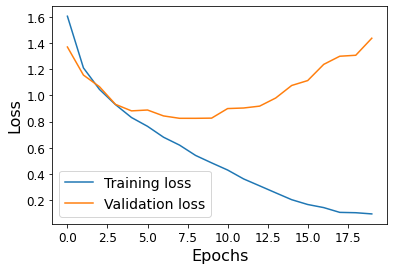

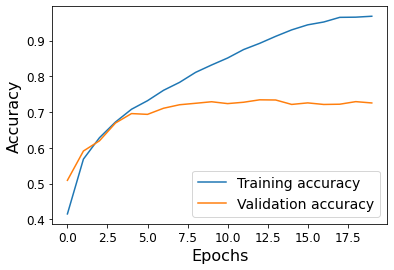

In [4]:
 # Define CNN with CONV-POOL-CONV-POOL-CONV-POOL-FC-FC architecture
model=Sequential([
keras.layers.Conv2D(32, kernel_size=(3,3),activation='relu', strides=1),
keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2,padding='same'),
keras.layers.Conv2D(64, kernel_size=(3,3),activation='relu', strides=1),
keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='same'),
keras.layers.Conv2D(64, kernel_size=(3,3),activation='relu', strides=1),
keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2,padding='same'),
keras.layers.Flatten(),
keras.layers.Dense(1024, activation='relu'),
keras.layers.Dense(10, activation='softmax')
])

# Configure optimizer, objective function and metrics to be evaluated
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train model using 20 epochs, batch size of 128 and 20% validation data
history=model.fit(x_train, y_train, batch_size=128,epochs=20,validation_split=0.2)

# Display various layers of CNN
model.summary()

# Evaluate model against test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\n Test accuracy: {test_acc}')

# Compare training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(['Training loss', 'Validation loss'], fontsize=14)
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(['Training accuracy', 'Validation accuracy'], fontsize=14)
plt.show()

**NET II: CONV- CONV -POOL-CONV-POOL-FC-FC**

Epoch 1/20
313/313 [==============================] - 7s 19ms/step - loss: 1.6199 - accuracy: 0.4068 - val_loss: 1.3302 - val_accuracy: 0.5291
Epoch 2/20
313/313 [==============================] - 6s 18ms/step - loss: 1.1926 - accuracy: 0.5748 - val_loss: 1.1068 - val_accuracy: 0.6075
Epoch 3/20
313/313 [==============================] - 5s 18ms/step - loss: 0.9928 - accuracy: 0.6485 - val_loss: 0.9697 - val_accuracy: 0.6633
Epoch 4/20
313/313 [==============================] - 5s 17ms/step - loss: 0.8636 - accuracy: 0.6984 - val_loss: 0.9266 - val_accuracy: 0.6826
Epoch 5/20
313/313 [==============================] - 5s 17ms/step - loss: 0.7494 - accuracy: 0.7366 - val_loss: 0.8867 - val_accuracy: 0.6946
Epoch 6/20
313/313 [==============================] - 5s 17ms/step - loss: 0.6428 - accuracy: 0.7752 - val_loss: 0.9035 - val_accuracy: 0.6990
Epoch 7/20
313/313 [==============================] - 6s 18ms/step - loss: 0.5310 - accuracy: 0.8146 - val_loss: 0.9062 - val_accuracy: 0.7123

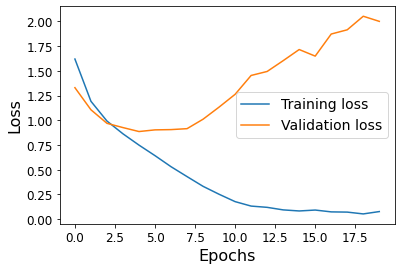

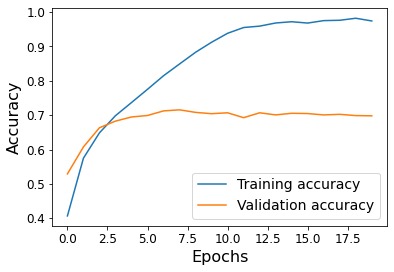

In [5]:
# Define CNN with CONV-POOL-CONV-POOL-CONV-POOL-FC-FC architecture 
model_2=Sequential([
keras.layers.Conv2D(32, kernel_size=(5,5),activation='relu', strides=1),
keras.layers.Conv2D(64, kernel_size=(5,5),activation='relu', strides=1),
keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2,padding='same'),
keras.layers.Conv2D(64, kernel_size=(5,5),activation='relu', strides=1),
keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2,padding='same'),
keras.layers.Flatten(),
keras.layers.Dense(1024, activation='relu'),
keras.layers.Dense(10, activation='softmax')
])

# Configure optimizer, objective function and metrics to be evaluated
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train model using 20 epochs, batch size of 128 and 20% validation data
history=model_2.fit(x_train, y_train, batch_size=128,epochs=20,validation_split=0.2)

# Display various layers of CNN
model_2.summary()

# Evaluate model against test data
test_loss, test_acc = model_2.evaluate(x_test, y_test, verbose=2)
print(f'\n Test accuracy: {test_acc}')

# Compare training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(['Training loss', 'Validation loss'], fontsize=14)
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(['Training accuracy', 'Validation accuracy'], fontsize=14)
plt.show()

**NET III: AN UPGRADE OF NET I AND NET II**

Epoch 1/40
313/313 [==============================] - 16s 49ms/step - loss: 1.9543 - accuracy: 0.2497 - val_loss: 1.6862 - val_accuracy: 0.3922
Epoch 2/40
313/313 [==============================] - 15s 48ms/step - loss: 1.5494 - accuracy: 0.4287 - val_loss: 1.3411 - val_accuracy: 0.4946
Epoch 3/40
313/313 [==============================] - 15s 49ms/step - loss: 1.3794 - accuracy: 0.5029 - val_loss: 1.2743 - val_accuracy: 0.5453
Epoch 4/40
313/313 [==============================] - 15s 48ms/step - loss: 1.2881 - accuracy: 0.5350 - val_loss: 1.1784 - val_accuracy: 0.5723
Epoch 5/40
313/313 [==============================] - 15s 48ms/step - loss: 1.2173 - accuracy: 0.5648 - val_loss: 1.1661 - val_accuracy: 0.5789
Epoch 6/40
313/313 [==============================] - 15s 48ms/step - loss: 1.1565 - accuracy: 0.5860 - val_loss: 1.0235 - val_accuracy: 0.6368
Epoch 7/40
313/313 [==============================] - 15s 48ms/step - loss: 1.1126 - accuracy: 0.6043 - val_loss: 0.9909 - val_accuracy:

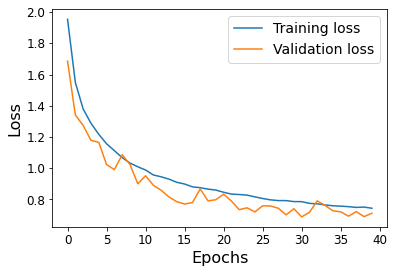

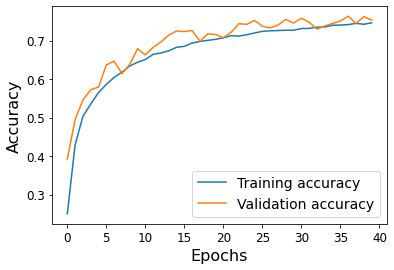

In [7]:
# Define CNN with CONV-CONV-POOL-DROPOUT-CONV-POOL-DROPOUT-CONV-CONV-CONV-POOL-DROPOUT-FC-FC- DROPOUT-FC architecture 
model_3=Sequential([
keras.layers.Conv2D(96, kernel_size=(3,3),activation='relu', strides=1),
keras.layers.Conv2D(96, kernel_size=(3,3),activation='relu', strides=1),
keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2,padding='same'),
keras.layers.Dropout(0.5, noise_shape=None, seed=None),
keras.layers.Conv2D(128, kernel_size=(3,3),activation='relu', strides=1),
keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2,padding='same'),
keras.layers.Dropout(0.5, noise_shape=None, seed=None),
keras.layers.Conv2D(128, kernel_size=(2,2),activation='relu', strides=1),
keras.layers.Conv2D(128, kernel_size=(2,2),activation='relu', strides=1),
keras.layers.Conv2D(128, kernel_size=(2,2),activation='relu', strides=1),
keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2,padding='same'),
keras.layers.Dropout(0.5, noise_shape=None, seed=None),
keras.layers.Flatten(),
keras.layers.Dense(1024, activation='relu'),
keras.layers.Dropout(0.5, noise_shape=None, seed=None),
keras.layers.Dense(512, activation='relu'),
keras.layers.Dropout(0.5, noise_shape=None, seed=None),
keras.layers.Dense(10, activation='softmax')
])

# Configure optimizer, objective function and metrics to be evaluated
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train model using 20 epochs, batch size of 128 and 40% validation data
history=model_3.fit(x_train, y_train, batch_size=128,epochs=40,validation_split=0.2)

# Display various layers of CNN
model_3.summary()

# Evaluate model against test data
test_loss, test_acc = model_3.evaluate(x_test, y_test, verbose=2)
print(f'\n Test accuracy: {test_acc}')

# Compare training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(['Training loss', 'Validation loss'], fontsize=14)
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(['Training accuracy', 'Validation accuracy'], fontsize=14)
plt.show()